In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
cat_=train_df.dtypes=='object'
cat__=list(cat_[cat_].index)
print(cat__)

['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']


In [17]:
train_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [19]:
train_df=train_df.dropna()

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [44]:
for i in cat__:
    print("Column: ",i,"-  Unique Values: ",train_df[i].nunique())

Column:  Name -  Unique Values:  4377
Column:  Platform -  Unique Values:  17
Column:  Genre -  Unique Values:  12
Column:  Publisher -  Unique Values:  262
Column:  User_Score -  Unique Values:  89
Column:  Developer -  Unique Values:  1289
Column:  Rating -  Unique Values:  7


In [45]:
train_df.drop(columns=['Name', 'Publisher', 'User_Score', 'Developer'], inplace=True)

In [46]:
train_df2=pd.get_dummies(train_df, columns=['Platform', 'Genre', 'Rating'])
train_df2.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0,False,...,False,True,False,False,True,False,False,False,False,False
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0,False,...,False,False,False,False,True,False,False,False,False,False
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0,False,...,False,True,False,False,True,False,False,False,False,False
6,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0,False,...,False,False,False,False,True,False,False,False,False,False
7,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0,False,...,False,False,False,False,True,False,False,False,False,False


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


X=train_df2.drop(columns='Global_Sales')

Y=train_df2['Global_Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [50]:
X_train.shape

(5460, 44)

In [51]:
Y_train.shape

(5460,)

In [54]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.fit_transform(X_test)


ridge=Ridge(alpha=1.0)

ridge.fit(X_train, Y_train)




Ridge()

In [55]:
preds=ridge.predict(X_test)

In [57]:
print(preds[0])

6.936585983228183


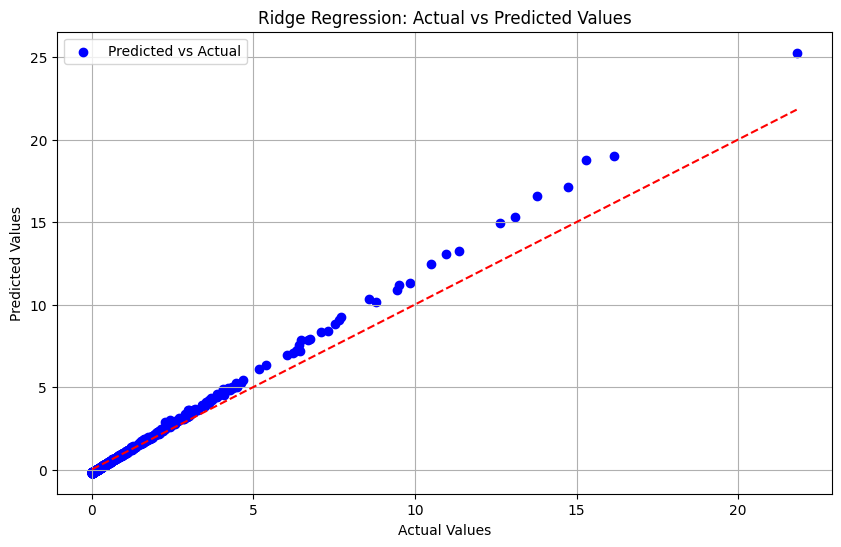

In [58]:
plt.figure(figsize=(10, 6))


plt.scatter(Y_test, preds, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.legend()


plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')

plt.grid(True)
plt.show()